In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
from keras.datasets import cifar10
from keras.datasets import cifar100
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import regularizers
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt


Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [6]:
(X_train, y_train0), (X_test, y_test0) = cifar10.load_data()
print(X_train.shape, X_train.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test.shape, X_test.dtype)
print(y_test0.shape, y_test0.dtype)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) int64


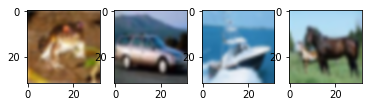

In [7]:
# 데이터 확인
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [8]:
# 자료형 변환 및 스케일링
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [9]:
# one - hot - encoding
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:4]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
np.random.seed(0)

model = Sequential()

model.add(Conv2D(128,(3,3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.1))

model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), activation='relu', padding='same'))
model.add(Conv2D(512,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
__________

In [13]:
hist = model.fit(X_train, Y_train, epochs=50, batch_size=50, validation_data=(X_test, Y_test), verbose=1)
print("Test ACCURACY : %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 23s 457us/step - loss: 0.9975 - acc: 0.6541 - val_loss: 0.8359 - val_acc: 0.7055
Epoch 2/50
50000/50000 [==============================] - 23s 455us/step - loss: 0.9004 - acc: 0.6901 - val_loss: 0.7799 - val_acc: 0.7289
Epoch 3/50
50000/50000 [==============================] - 23s 456us/step - loss: 0.8262 - acc: 0.7183 - val_loss: 0.7095 - val_acc: 0.7582
Epoch 4/50
50000/50000 [==============================] - 23s 456us/step - loss: 0.7694 - acc: 0.7365 - val_loss: 0.6974 - val_acc: 0.7650
Epoch 5/50
50000/50000 [==============================] - 23s 457us/step - loss: 0.7297 - acc: 0.7487 - val_loss: 0.6528 - val_acc: 0.7792
Epoch 6/50
50000/50000 [==============================] - 23s 455us/step - loss: 0.6887 - acc: 0.7652 - val_loss: 0.6789 - val_acc: 0.7748
Epoch 7/50
50000/50000 [==============================] - 23s 455us/step - loss: 0.6640 - acc: 0.7737 - val_loss: 0.

In [14]:
print("Test ACCURACY : %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 2s 165us/step
Test ACCURACY : 0.8137


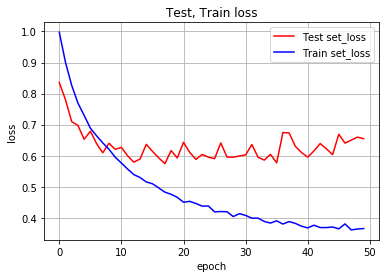

In [15]:
# 테스트 셋의 오차
y_vloss = hist.history['val_loss']

# 학습셋의 오차
y_loss = hist.history['loss']

# 테스트 셋의 정확도
y_vacc = hist.history['val_acc']
# 학습셋의 정확도
y_acc = hist.history['acc']


# 학습셋 테스트셋 오차율 그래프

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, c='red', label  = 'Test set_loss')
plt.plot(x_len, y_loss, c='blue', label  = 'Train set_loss')

plt.title('Test, Train loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


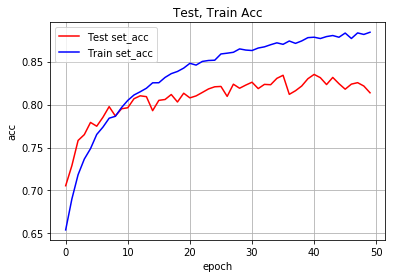

In [17]:
# 학습셋 테스트셋 정확도 그래프
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, c='red', label  = 'Test set_acc')
plt.plot(x_len, y_acc, c='blue', label  = 'Train set_acc')

plt.title('Test, Train Acc')
plt.legend(loc = 'upper left')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()